In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve,auc,classification_report,confusion_matrix,plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score,train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
SMOTE=SMOTE(random_state=0)

In [2]:
remove=[0,16,-1]
df=pd.read_csv("FICO_excellent.csv")
df.drop(df.columns[remove],axis=1,inplace=True)
y=df["status_time"].values
x=df.drop("status_time", axis=1).values
train_x1, test_x1, train_y1, test_y1=train_test_split(x, y, train_size=0.8,random_state=0)
print("default before SMOTE:", len(train_y1[train_y1==1]))
print("pay off before SMOTE:", len(train_y1[train_y1==2]))
#train_x1, train_y1=SMOTE.fit_sample(train_x1, train_y1)
model1=RandomForestClassifier(oob_score=True,random_state=7,n_jobs=-1)
model1.fit(train_x1, train_y1)
print("default after SMOTE:", len(train_y1[train_y1==1]))
print("pay off after SMOTE:", len(train_y1[train_y1==2]))

default before SMOTE: 816
pay off before SMOTE: 3236
default after SMOTE: 816
pay off after SMOTE: 3236


In [3]:
df=pd.read_csv("FICO_good.csv")
df.drop(df.columns[remove],axis=1,inplace=True)
y=df["status_time"].values
x=df.drop("status_time", axis=1).values
train_x2, test_x2, train_y2, test_y2=train_test_split(x, y, train_size=0.8,random_state=0)
print("default before SMOTE:", len(train_y2[train_y2==1]))
print("pay off before SMOTE:", len(train_y2[train_y2==2]))
train_x2, train_y2=SMOTE.fit_sample(train_x2, train_y2)
model2=RandomForestClassifier(oob_score=True,random_state=7,n_jobs=-1)
model2.fit(train_x2, train_y2)
print("default after SMOTE:", len(train_y2[train_y2==1]))
print("pay off after SMOTE:", len(train_y2[train_y2==2]))

default before SMOTE: 5334
pay off before SMOTE: 9150
default after SMOTE: 9150
pay off after SMOTE: 9150


In [4]:
df=pd.read_csv("FICO_low.csv")
df.drop(df.columns[remove],axis=1,inplace=True)
y=df["status_time"].values
x=df.drop("status_time", axis=1).values
train_x3, test_x3, train_y3, test_y3=train_test_split(x, y, train_size=0.8,random_state=0)
print("default before SMOTE:", len(train_y3[train_y3==1]))
print("pay off before SMOTE:", len(train_y3[train_y3==2]))
train_x3, train_y3=SMOTE.fit_sample(train_x3, train_y3)
model3=RandomForestClassifier(oob_score=True,random_state=7,n_jobs=-1)
model3.fit(train_x3, train_y3)
print("default after SMOTE:", len(train_y3[train_y3==1]))
print("pay off after SMOTE:", len(train_y3[train_y3==2]))

default before SMOTE: 6058
pay off before SMOTE: 8788
default after SMOTE: 8788
pay off after SMOTE: 8788


In [5]:
y_pred1 = model1.predict_proba(test_x1)
y_pred10 = model1.predict(test_x1)
print(confusion_matrix(test_y1-1, y_pred10-1))
print(classification_report(test_y1-1, y_pred10-1))
fpr1, tpr1, threshold1 = roc_curve(test_y1,y_pred1[:,-1],pos_label=2)
roc_auc1 = auc(fpr1, tpr1)
y_pred2 = model2.predict_proba(test_x2)
y_pred20 = model2.predict(test_x2)
print(confusion_matrix(test_y2-1, y_pred20-1))
print(classification_report(test_y2-1, y_pred20-1))
fpr2, tpr2, threshold2 = roc_curve(test_y2,y_pred2[:,-1],pos_label=2)
roc_auc2 = auc(fpr2, tpr2)
y_pred3 = model3.predict_proba(test_x3)
y_pred30 = model2.predict(test_x3)
print(confusion_matrix(test_y3-1, y_pred30-1))
print(classification_report(test_y3-1, y_pred30-1))
fpr3, tpr3, threshold3 = roc_curve(test_y3,y_pred3[:,-1],pos_label=2)
roc_auc3 = auc(fpr3, tpr3)

[[ 98  98]
 [ 50 767]]
              precision    recall  f1-score   support

           0       0.66      0.50      0.57       196
           1       0.89      0.94      0.91       817

    accuracy                           0.85      1013
   macro avg       0.77      0.72      0.74      1013
weighted avg       0.84      0.85      0.85      1013

[[ 987  291]
 [ 390 1954]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1278
           1       0.87      0.83      0.85      2344

    accuracy                           0.81      3622
   macro avg       0.79      0.80      0.80      3622
weighted avg       0.82      0.81      0.81      3622

[[ 849  620]
 [ 311 1932]]
              precision    recall  f1-score   support

           0       0.73      0.58      0.65      1469
           1       0.76      0.86      0.81      2243

    accuracy                           0.75      3712
   macro avg       0.74      0.72      0.73      37

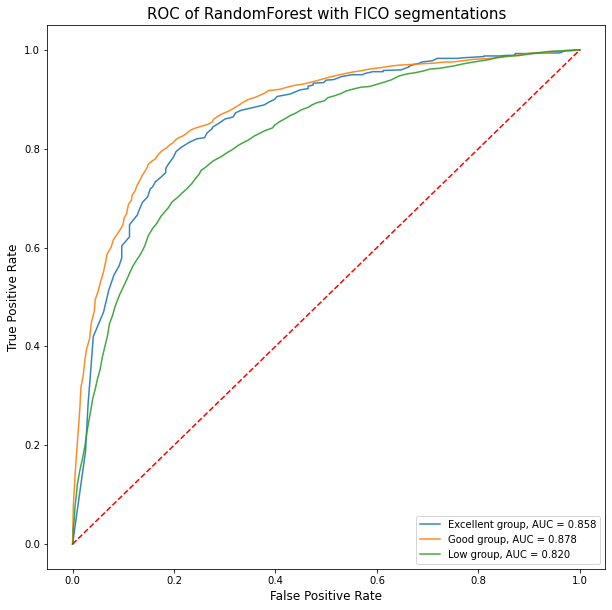

In [6]:
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, label = 'Excellent group'+', AUC = %0.3f' % roc_auc1,alpha=0.9)
plt.plot(fpr2, tpr2, label = 'Good group'+', AUC = %0.3f' % roc_auc2,alpha=0.9)
plt.plot(fpr3, tpr3, label = 'Low group'+', AUC = %0.3f' % roc_auc3,alpha=0.9)
plt.plot([0,1],[0,1],"r--")
plt.legend(loc = 'lower right')
plt.title("ROC of RandomForest with FICO segmentations",fontsize=15)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.show()

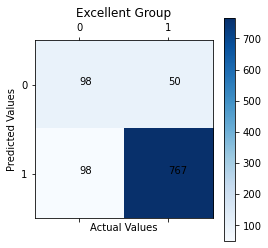

In [7]:
cm1=confusion_matrix(test_y1-1, y_pred10-1)
cm2=confusion_matrix(test_y2-1, y_pred20-1)
cm3=confusion_matrix(test_y3-1, y_pred30-1)
plt.matshow(cm1,cmap=plt.cm.Blues)
plt.colorbar()
plt.annotate(cm1[0,1],xy=(0,1))
plt.annotate(cm1[1,1],xy=(1,1))
plt.annotate(cm1[0,0],xy=(0,0))
plt.annotate(cm1[1,0],xy=(1,0))
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Excellent Group")
plt.show()

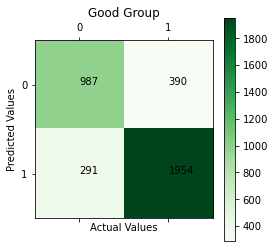

In [8]:
plt.matshow(cm2,cmap=plt.cm.Greens)
plt.colorbar()
plt.annotate(cm2[0,1],xy=(0,1))
plt.annotate(cm2[1,1],xy=(1,1))
plt.annotate(cm2[0,0],xy=(0,0))
plt.annotate(cm2[1,0],xy=(1,0))
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Good Group")
plt.show()

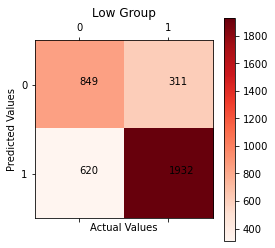

In [9]:
plt.matshow(cm3,cmap=plt.cm.Reds)
plt.colorbar()
plt.annotate(cm3[0,1],xy=(0,1))
plt.annotate(cm3[1,1],xy=(1,1))
plt.annotate(cm3[0,0],xy=(0,0))
plt.annotate(cm3[1,0],xy=(1,0))
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Low Group")
plt.show()